In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

In [56]:
df = pd.read_csv('LungCapData.csv')

In [57]:
df.drop('Unnamed: 0', axis=1, inplace=True)

df.columns

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [58]:
print(df.head())
print("--------------------------------------------------------------------------------")
print(df.isnull().sum())
print("--------------------------------------------------------------------------------")
print(df.info())
print("--------------------------------------------------------------------------------")
print(df.describe())

   LungCap  Age  Height Smoke  Gender Caesarean
0    6.475    6    62.1    no    male        no
1   10.125   18    74.7   yes  female        no
2    9.550   16    69.7    no  female       yes
3   11.125   14    71.0    no    male        no
4    4.800    5    56.9    no    male        no
--------------------------------------------------------------------------------
LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int

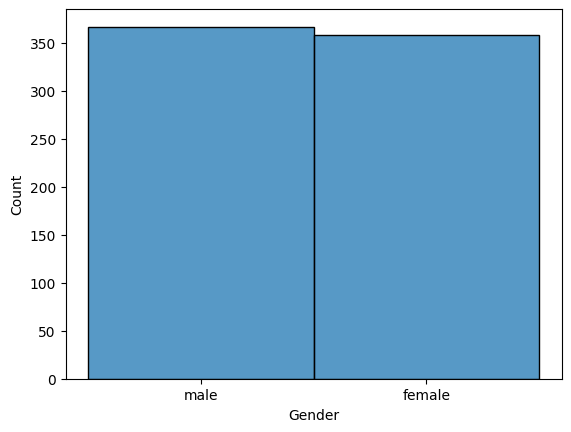

In [59]:
sns.histplot(df['Gender'], bins = 2)
plt.show()

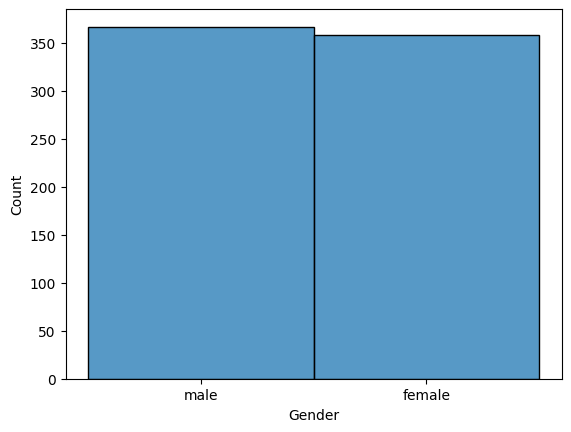

In [60]:
sns.histplot(df['Gender'], bins = 2)
plt.show()

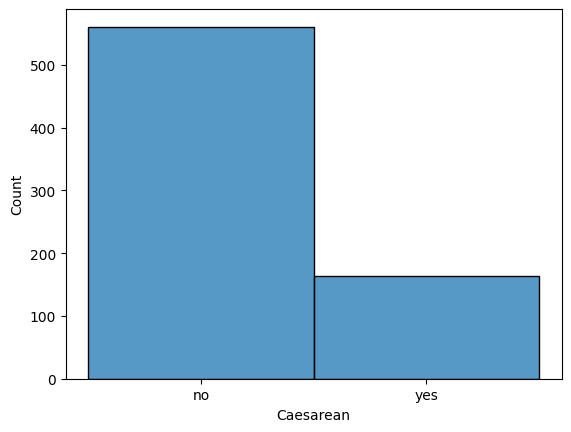

In [61]:
sns.histplot(df['Caesarean'], bins = 2)
plt.show()

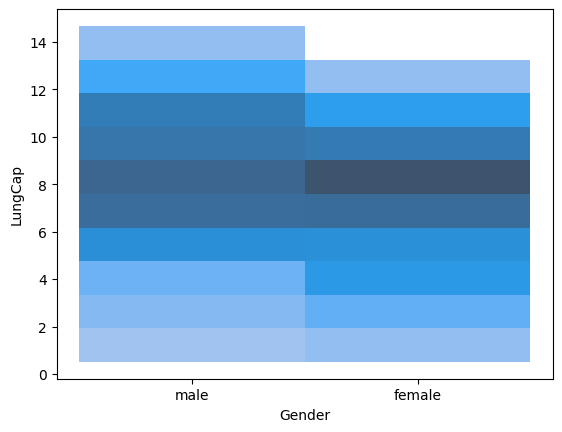

In [62]:
sns.histplot(data=df, x='Gender', y='LungCap', bins=10, kde=False)
plt.show()

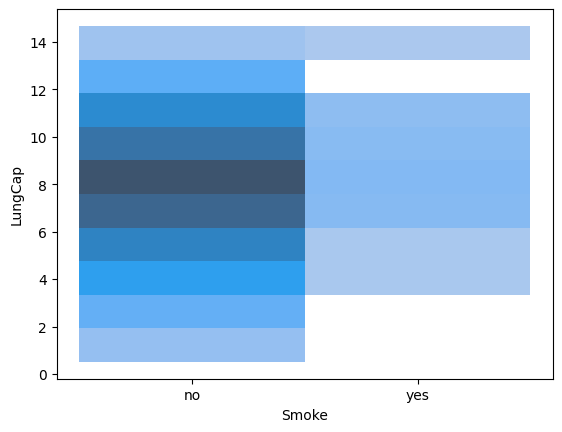

In [63]:
sns.histplot(data=df, x='Smoke', y='LungCap', bins=10, kde=False)
plt.show()

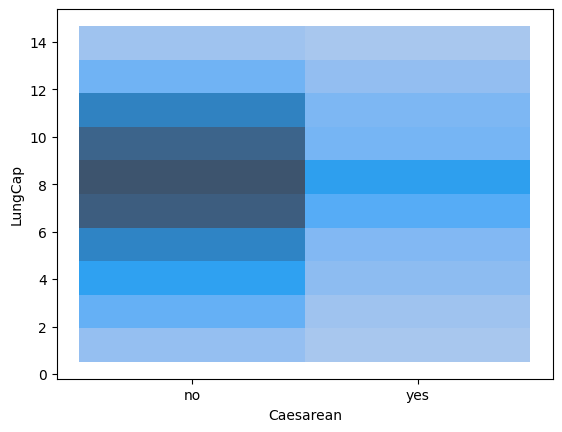

In [64]:
sns.histplot(data=df, x='Caesarean', y='LungCap', bins=10, kde=False)
plt.show()

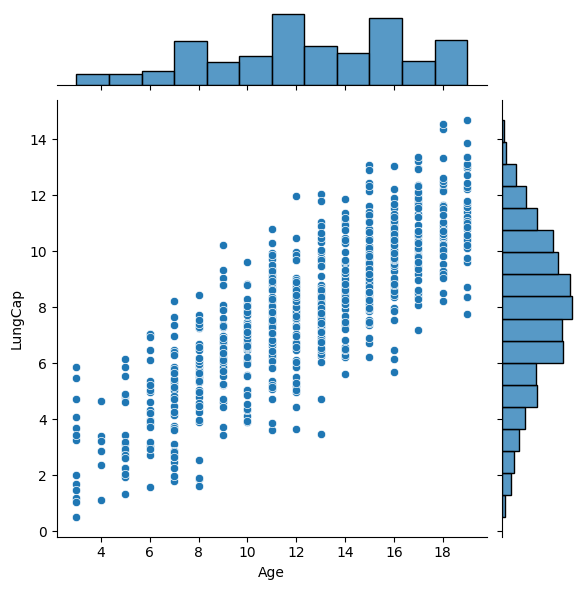

In [65]:
sns.jointplot(x='Age', y='LungCap', data=df)
plt.show()

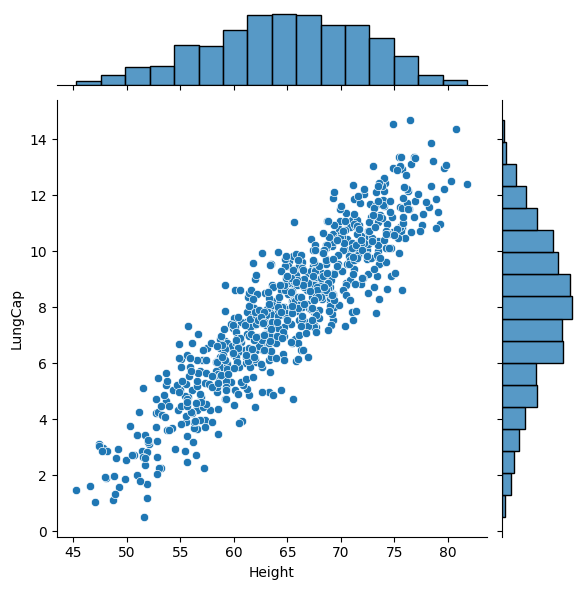

In [66]:
sns.jointplot(x='Height', y='LungCap', data=df)
plt.show()

In [67]:
X = df.iloc[:, 1:6].values
y = df.iloc[:, 0].values

In [68]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3, 4])], remainder='passthrough')

X = np.array(ct.fit_transform(X))

print(X)

[[1.0 0.0 0.0 ... 0.0 6 62.1]
 [0.0 1.0 1.0 ... 0.0 18 74.7]
 [1.0 0.0 1.0 ... 1.0 16 69.7]
 ...
 [0.0 1.0 1.0 ... 0.0 11 60.5]
 [1.0 0.0 1.0 ... 0.0 15 64.9]
 [1.0 0.0 0.0 ... 0.0 10 67.7]]


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
sc = StandardScaler()
X_train[:, 6:] = sc.fit_transform(X_train[:, 6:])
X_test[:, 6:] = sc.transform(X_test[:, 6:])

In [157]:
cbr = CatBoostRegressor(
    iterations=500,           # Number of boosting iterations
    learning_rate=0.055,       # Step size shrinkage
    depth=1,                  # Depth of the trees
    l2_leaf_reg=9,            # L2 regularization coefficient
    loss_function='RMSE',     # Standard loss function for regression
    random_seed=42,           # For reproducibility
    verbose=0,
)

In [160]:
cbr.fit(X_train, y_train, early_stopping_rounds=100, verbose = 100)

0:	learn: 2.5824492	total: 242us	remaining: 121ms
100:	learn: 1.0611080	total: 12.3ms	remaining: 48.7ms
200:	learn: 1.0019010	total: 23.4ms	remaining: 34.9ms
300:	learn: 0.9915566	total: 33.6ms	remaining: 22.2ms
400:	learn: 0.9873213	total: 44ms	remaining: 10.9ms
499:	learn: 0.9842548	total: 56.8ms	remaining: 0us


In [161]:
y_pred = cbr.predict(X_test)

print(y_pred)

[11.60210735  2.83402428 10.37316958  7.70727245  8.3271906  10.59304825
 10.75803384  8.4929024   8.08690394  6.78362446  7.39277867  7.72573004
 12.03050287 10.25905534  8.65930988  9.82474695  4.42086257  4.34875896
  9.28808251  6.15064695 11.17082357  6.49177874  9.42871802  9.41140206
  6.05729526  7.31748365  2.17878702 10.68248202 10.19172581  6.64813436
  7.87949126  8.4929024   8.22482639  6.78362446  2.945709    8.11593883
  3.18486101  5.58595333  5.75157353 10.50793526  3.60861368  9.80630822
  4.8271386   2.20917518  4.20920634  8.01164634  9.78710621 10.99774195
  7.58381068  7.453038    1.77482133  8.20584715  4.60061079  7.92574496
 10.7664606  10.96959426  7.49449856  6.49177874  5.16312489  7.87949126
  5.15306459 12.65971386  8.61582657  7.92574496  8.07977562 11.79222122
  7.73784134  6.8258389   4.81113032  8.15811705  9.69801314 12.03050287
  6.65937783  9.29723297  7.12483229  5.15146984  8.37280583  6.42086396
  6.01810634  2.86637731  8.30989367  9.00124416  8

In [162]:
print("\n--- CatBoost Model Evaluation ---")

mae_cat = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) - CatBoost: {mae_cat:.4f}")

mse_cat = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) - CatBoost: {mse_cat:.4f}")

rmse_cat = np.sqrt(mse_cat)
print(f"Root Mean Squared Error (RMSE) - CatBoost: {rmse_cat:.4f}")

r2_cat = r2_score(y_test, y_pred)
print(f"R-squared (R2 Score) - CatBoost: {r2_cat:.4f}")


--- CatBoost Model Evaluation ---
Mean Absolute Error (MAE) - CatBoost: 0.8536
Mean Squared Error (MSE) - CatBoost: 1.0780
Root Mean Squared Error (RMSE) - CatBoost: 1.0383
R-squared (R2 Score) - CatBoost: 0.8486


In [165]:
n_test = len(y_test)
p_test = X_test.shape[1] # Make sure X_test.shape[1] reflects the actual number of features used by the model
if (n_test - p_test - 1) > 0:
    adjusted_r2_cat = 1 - ((1 - r2_cat) * (n_test - 1)) / (n_test - p_test - 1)
    print(f"Adjusted R-squared (Adj. R2) - CatBoost: {adjusted_r2_cat:.4f}")
else:
    print("Cannot calculate Adjusted R-squared for CatBoost: Insufficient observations relative to predictors.")

Adjusted R-squared (Adj. R2) - CatBoost: 0.8397



Feature Importances:
         Feature  Importance
7         Height   76.285043
6            Age   22.642952
3    Gender_male    0.406393
2  Gender_female    0.309546
0       Smoke_no    0.179010
1      Smoke_yes    0.123974
5  Caesarean_yes    0.039135
4   Caesarean_no    0.013946


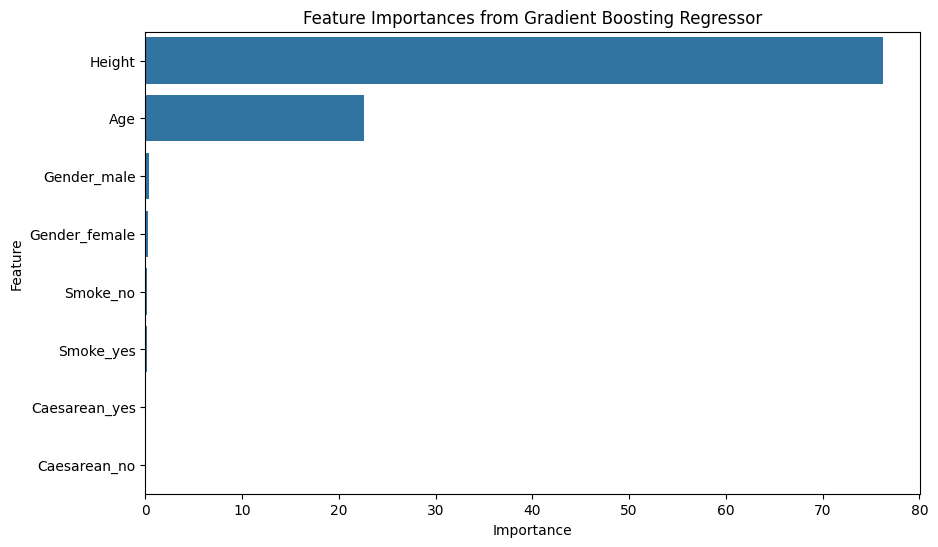

In [168]:
importances =cbr.feature_importances_

# Adjust the feature_names list to match the number of features in X_train
# Since one-hot encoding was applied, the number of features increased.
# We need to account for the one-hot encoded columns.
feature_names = ['Smoke_no', 'Smoke_yes', 'Gender_female', 'Gender_male', 
                'Caesarean_no', 'Caesarean_yes', 'Age', 'Height']

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7fdd4646-3c0f-45bc-8599-1b57e5eef90c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>